In [1]:
import sys
sys.path.insert(0,'../python/')
from OpticalPhoton import *
import matplotlib.pyplot as plt

In [38]:
myPhoton = OpticalPhoton(zbot=-5, ztop=2)
myPhoton_no = OpticalPhoton(zbot=-5, ztop=2)
myPhoton_no.set_no_scattering(True)


xb = []
yb = []
xt = []
yt = []
xb_no = []
yb_no = []
xt_no = []
yt_no = []

x0 = (0,0,-2)
for i in range(100000):
    if i%10000 == 0:
        print('processed ',i,' photons')
    # normal
    myPhoton.generate_photon(x0=x0)
    myPhoton.propagate()
    
    if myPhoton.is_detected():
        x = myPhoton.get_photon_position()
        #myPhoton.print()
        if x[2]<0:
            xb.append(x[0])
            yb.append(x[1])
        else:
            xt.append(x[0])
            yt.append(x[1])
    # no scatter
    myPhoton_no.generate_photon(x0=x0)
    myPhoton_no.propagate()
    
    if myPhoton_no.is_detected():
        x = myPhoton_no.get_photon_position()
        #myPhoton.print()
        if x[2]<0:
            xb_no.append(x[0])
            yb_no.append(x[1])
        else:
            xt_no.append(x[0])
            yt_no.append(x[1])
    
xb = np.array(xb)
yb = np.array(yb)
xt = np.array(xt)
yt = np.array(yt)
xb_no = np.array(xb_no)
yb_no = np.array(yb_no)
xt_no = np.array(xt_no)
yt_no = np.array(yt_no)

print(len(xb), len(xt))

processed  0  photons
processed  10000  photons
processed  20000  photons
processed  30000  photons
processed  40000  photons
processed  50000  photons
processed  60000  photons
processed  70000  photons
processed  80000  photons
processed  90000  photons
10587 3608


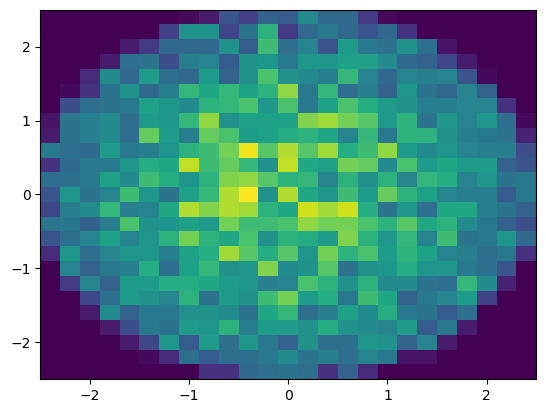

In [39]:
h2=plt.hist2d(xb,yb,bins=(25,25),range=((-2.5,2.5),(-2.5,2.5)))

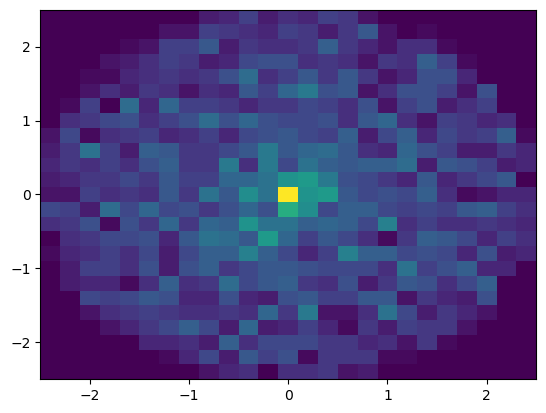

In [40]:
h2=plt.hist2d(xt,yt,bins=(25,25),range=((-2.5,2.5),(-2.5,2.5)))

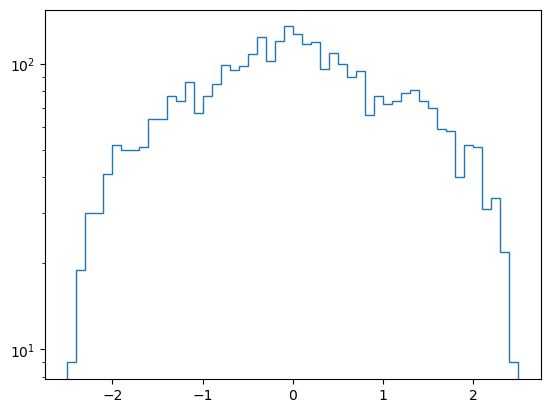

In [42]:
plt.hist(xt,bins=50,range=(-2.5,2.5), histtype='step')
plt.hist(xt_no,bins=50,range=(-2.5,2.5), histtype='step')

plt.yscale('log')

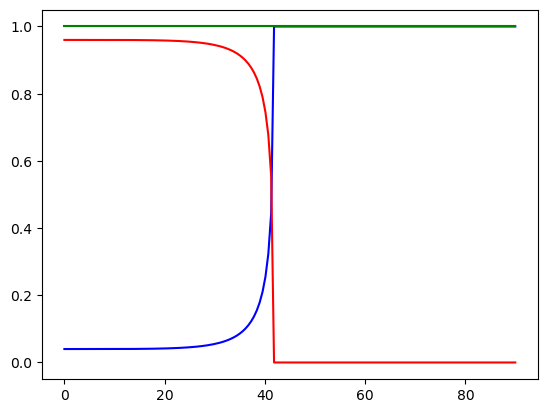

In [43]:
theta = np.arange(0,np.pi/2,0.01)

rrs = []
tts = []
rrp = []
ttp = []
for th in theta:
    R,T= myPhoton.fresnel_coefficients_average(1.5, 1.0, th)
    
    rrs.append(R)
    tts.append(T)

    
    
    
rrs = np.array(rrs)
tts = np.array(tts)

plt.plot(theta*180/3.1415,rrs,'blue')
plt.plot(theta*180/3.1415,tts,'red')
plt.plot(theta*180/3.1415,tts+rrs,'green')
#plt.ylim([-2,2])